In [ ]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 
 

Mounted at /content/drive


In [ ]:
# import data set from the local driver 
df =pd.read_csv("drive/My Drive/Colab Notebooks/water_dataset.csv")
df.head() 
 

,Temp,do,ph,co,bod,year
0,29.8,5.7,7.2,189.0,2,2014
1,29.5,6.3,6.9,179.0,1.7,2014
2,29.7,5.8,6.9,64.0,3.8,2014
3,29.5,5.8,7.3,83.0,1.9,2014
4,30,5.5,7.4,81.0,1.5,2014


In [ ]:
# applying ffill() method to fill the missing values
df.ffill(axis = 1) 

,Temp,do,ph,co,bod,year
0,29.8,5.7,7.2,189.0,2,2014
1,29.5,6.3,6.9,179.0,1.7,2014
2,29.7,5.8,6.9,64.0,3.8,2014
3,29.5,5.8,7.3,83.0,1.9,2014
4,30,5.5,7.4,81.0,1.5,2014
...,...,...,...,...,...,...
1985,0,7.9,738.0,7.2,2.7,2003
1986,29,7.5,585.0,6.3,2.6,2003
1987,28,7.6,98.0,6.2,1.2,2003
1988,28,7.7,91.0,6.5,1.3,2003


In [ ]:
# Count total NaN at each column in a DataFrame 
df.isnull().sum() 

Temp    0
do      0
ph      0
co      0
bod     0
year    0
dtype: int64

In [ ]:
# checking the data type of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    1990 non-null   object 
 1   do      1990 non-null   float64
 2   ph      1990 non-null   float64
 3   co      1990 non-null   float64
 4   bod     1990 non-null   object 
 5   year    1990 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 93.4+ KB


In [ ]:
# making year  as index 
df1= df.set_index('year') 
df1.head()

,Temp,do,ph,co,bod
year,,,,,
2014,29.8,5.7,7.2,189.0,2
2014,29.5,6.3,6.9,179.0,1.7
2014,29.7,5.8,6.9,64.0,3.8
2014,29.5,5.8,7.3,83.0,1.9
2014,30,5.5,7.4,81.0,1.5


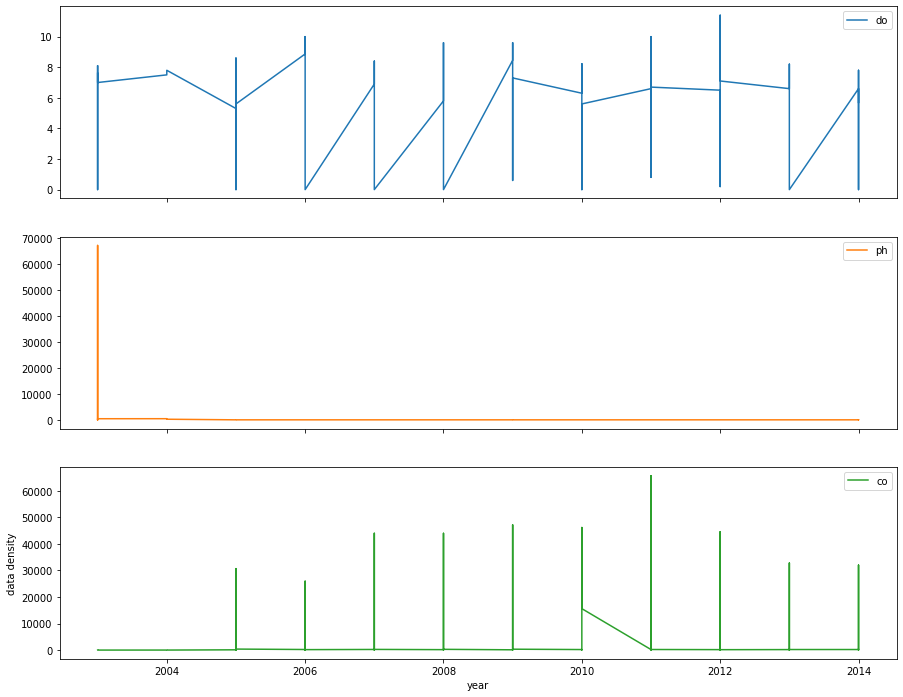

In [ ]:
# exploring the data 
# plot the time series and see its pattern. 
df1.plot(figsize=(15,12),subplots=True ) 
plt.ylabel("data density");  

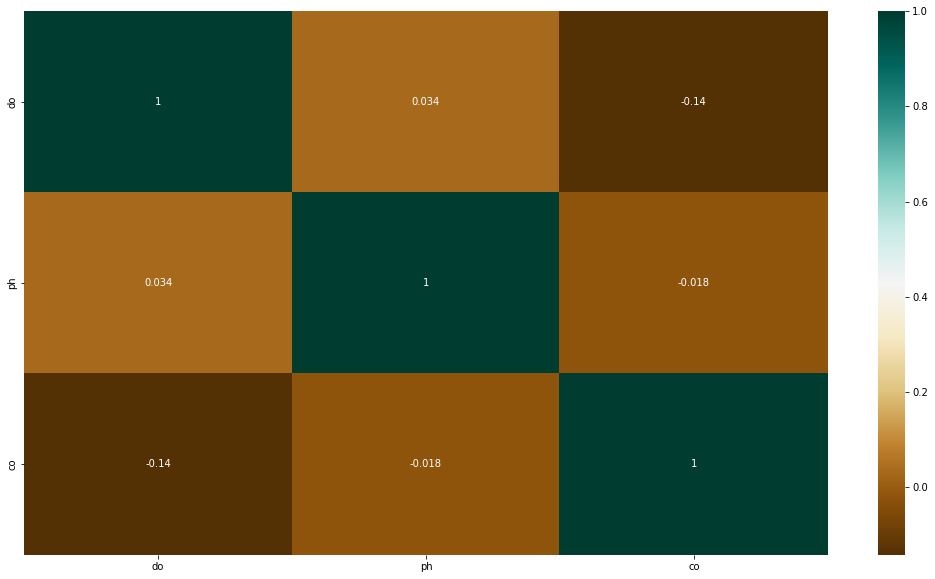

In [ ]:
# Finding the relations between the variables using the correlation 
plt.figure(figsize=(18,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True) 
#c  

In [ ]:
# # For content length, use the Min max Scalar.  
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['do','ph','co'] 
scaler = MinMaxScaler() 
df1[con_feats] = scaler.fit_transform(df1[con_feats])
df1.head()  

,Temp,do,ph,co,bod
year,,,,,
2014,29.8,0.500000,0.000107,0.002877,2
2014,29.5,0.552632,0.000103,0.002725,1.7
2014,29.7,0.508772,0.000103,0.000974,3.8
2014,29.5,0.508772,0.000109,0.001263,1.9
2014,30,0.482456,0.000110,0.001233,1.5


In [ ]:
# One Hot Encode the categorical features in the dataset 

# Get a list of all the columns' names with object dtype  
obj_columns = list(df1.select_dtypes(include=['object']).columns) 
elastic_df3_encoded = pd.get_dummies(data=df1, columns=obj_columns)
elastic_df3_encoded.head(2)  

,do,ph,co,Temp_,Temp_0,Temp_10,Temp_11,Temp_12,Temp_14,Temp_15,...,bod_9.2,bod_9.333,bod_9.4,bod_9.5,bod_9.6,bod_9.7,bod_9.75,bod_9.8,bod_9.875,bod_9.9
year,,,,,,,,,,,,,,,,,,,,,
2014,0.500000,0.000107,0.002877,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,0.552632,0.000103,0.002725,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Split the Data to train and Test 

In [ ]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(elastic_df3_encoded, test_size=0.2, random_state=42)    

In [ ]:
#transform to ndarray both train and testing 
x_good_train = x_good_train.values #transform to ndarray 
x_good_test = x_good_test.values 
x_good_train.shape, x_good_test.shape#,x_good_train.shape,test_y.shape  

((1592, 590), (398, 590))

### import important libraries 

In [ ]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime 

In [ ]:
model = Sequential()
# encoder 
model.add(Dense(128, input_dim=x_good_train.shape[1], activation='relu')) # Input layers 
Dropout(0.01), 
# hidden layers
model.add(Dense(64, activation='relu'))
Dropout(0.01), 
# model.add(Dense(64, activation='relu'))
# Dropout(0.001), 
#Decoder 
model.add(Dense(128, activation='relu')) ## decoder 
Dropout(0.01), 
model.add(Dense(x_good_train.shape[1])) # output layers 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model.summary() 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               75648     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 128)               8320      
                                                                 
 dense_38 (Dense)            (None, 590)               76110     
                                                                 
Total params: 168,334
Trainable params: 168,334
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_good_test.shape[1]

590

In [ ]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=15,
    batch_size=256,
    validation_data=(x_good_test, x_good_test), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0]) 
print('Accuracy:', score[1]) 

Epoch 1/15
7/7 - 1s - loss: 0.0020 - accuracy: 0.0402 - val_loss: 0.0019 - val_accuracy: 0.0528 - 713ms/epoch - 102ms/step
Epoch 2/15
7/7 - 0s - loss: 0.0019 - accuracy: 0.0207 - val_loss: 0.0018 - val_accuracy: 0.0000e+00 - 122ms/epoch - 17ms/step
Epoch 3/15
7/7 - 0s - loss: 0.0018 - accuracy: 6.2814e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00 - 102ms/epoch - 15ms/step
Epoch 4/15
7/7 - 0s - loss: 0.0017 - accuracy: 6.2814e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00 - 103ms/epoch - 15ms/step
Epoch 5/15
7/7 - 0s - loss: 0.0016 - accuracy: 6.2814e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00 - 103ms/epoch - 15ms/step
Epoch 6/15
7/7 - 0s - loss: 0.0015 - accuracy: 6.2814e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00 - 128ms/epoch - 18ms/step
Epoch 7/15
7/7 - 0s - loss: 0.0015 - accuracy: 6.2814e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00 - 124ms/epoch - 18ms/step
Epoch 8/15
7/7 - 0s - loss: 0.0014 - accuracy: 6.2814e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+

### Plot training and test loss

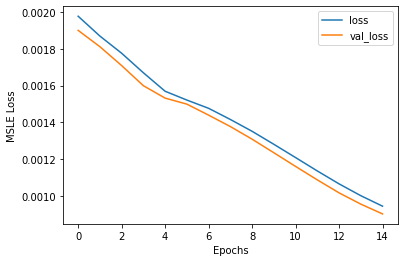

In [ ]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['val_loss'])
#plt.plot(grid.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss','val_loss'])#,'accuracy'])
plt.show()   

In [ ]:
# to identify the reconstruction error between the Decoder and encoder 
test_x_predictions = model.predict(x_good_test)#,verbose=1)

13/13 [==============================] - 0s 2ms/step


In [ ]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')   

The performance  of autoencoder:

Mean Absolute Error: 0.1870
Mean Square Error:0.0450
Root Mean Square Error: 0.2122

